# <center>Especialización en Ciencia de Datos </center>

##<center>4.1. Aprendizaje Automático</center>
###<center>Aprendizaje Supervisado</center>
<center>Trabajo Práctico Nº4<center>
 <center>Dept. de Cs. e Ing. de la Comp. -- Universidad Nacional del Sur </center>

## Fecha de entrega: 
21 de octubre 2022

### Recuerden no borrar la salida en las celdas de salida.

Ingrese nombre y apellido

In [1]:
nombreyapellido = "Octavio Gzain"
print (nombreyapellido)

Octavio Gzain


## Dataset

En esta notebook trabajaremos con el dataset conocido como [palmerpenguins](https://allisonhorst.github.io/palmerpenguins/).

El dataset continee datos de 344 pingüinos de 3 especies diferentes (Adelie, Chinstrap y Gentoo), recopilados de 3 islas (Torgersen, Biscoe y Dream) en el Archipiélago Palmer, Antártida.





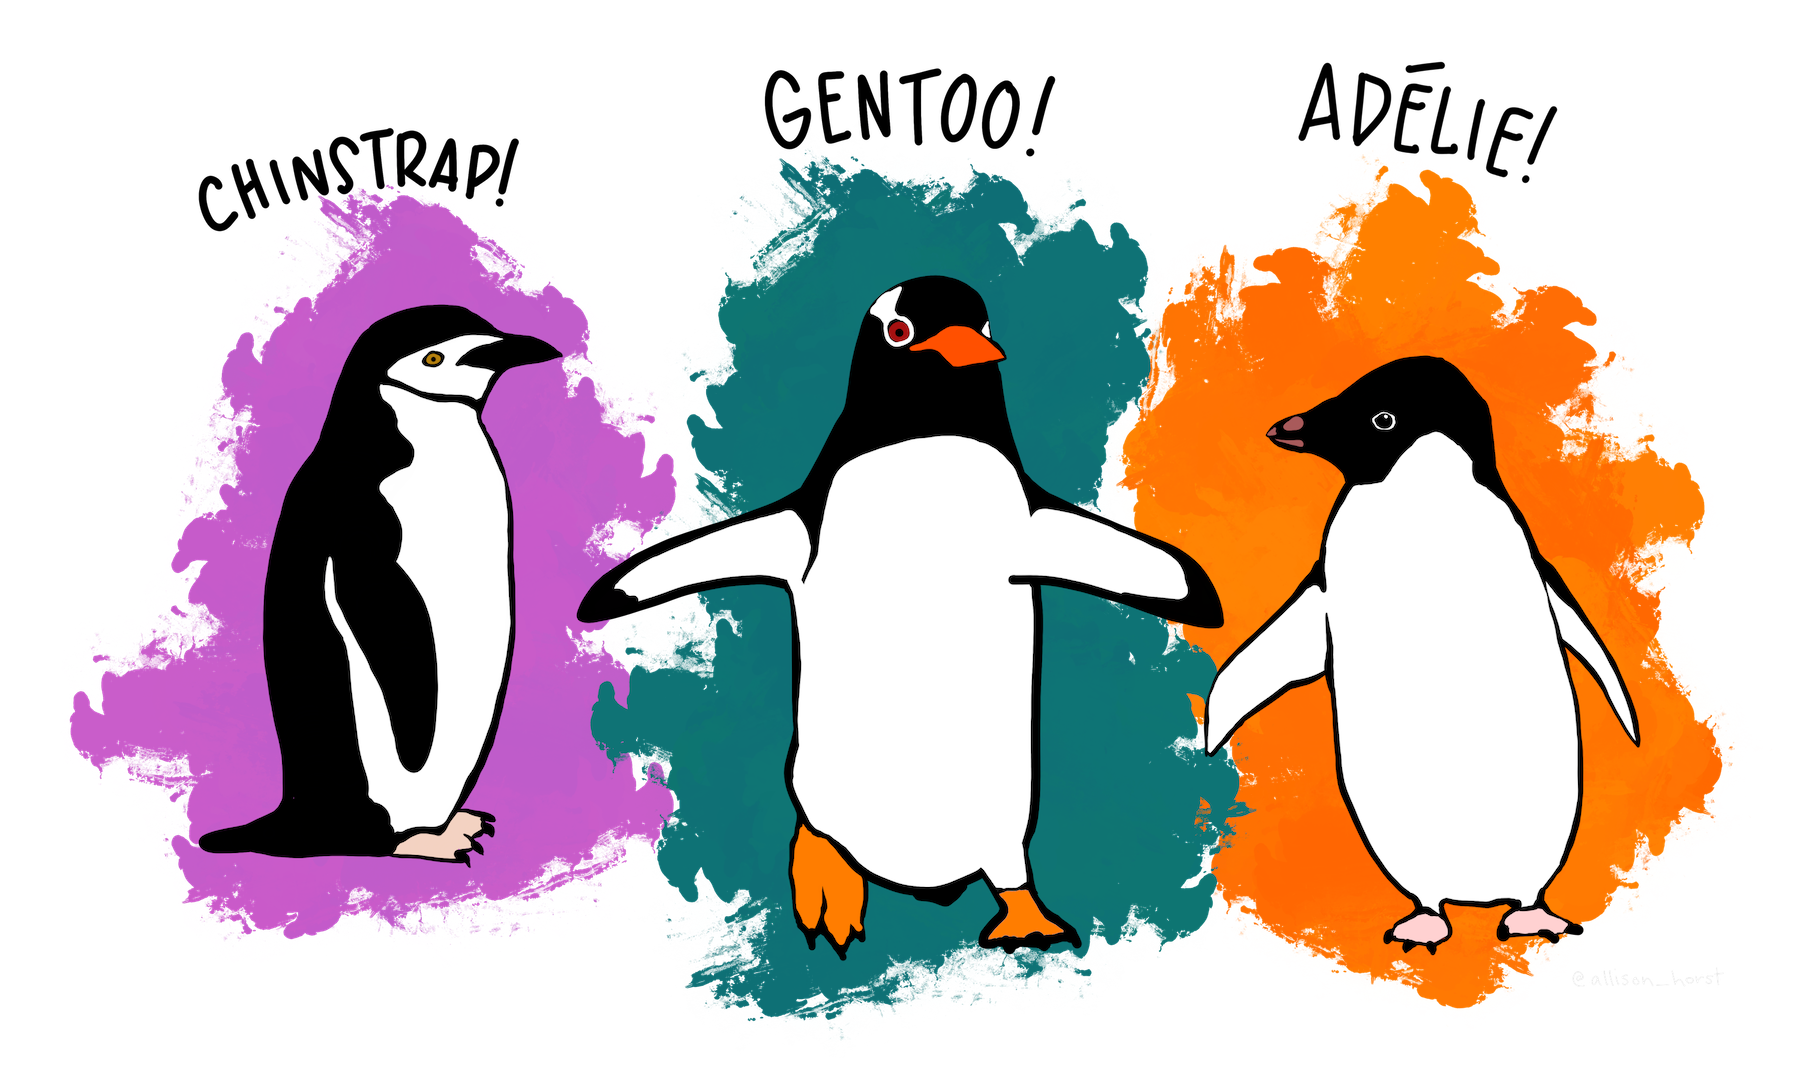

Carguemos el dataframe de Seaborn.

In [2]:
import seaborn as sns
df = sns.load_dataset("penguins")

Analicemos el dataframe usando Pandas

In [3]:
import pandas as pd
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Eliminemos las filas que contiene datos faltantes

In [5]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


Veamos cuántos pingüinos hay de cada especie:

In [6]:
pd.value_counts(df.species)

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

Veamos cuántos pingüinos hay de cada isla:

In [7]:
pd.value_counts(df.island)

Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64

Veamos si distintas especies co-habitan una misma isla

In [8]:
df.groupby(['island', 'species']).size().reset_index(name='counts')

,island,species,counts
0,Biscoe,Adelie,44
1,Biscoe,Gentoo,119
2,Dream,Adelie,55
3,Dream,Chinstrap,68
4,Torgersen,Adelie,47


Realicemos un análisis exploratorio visual con Seaborn:

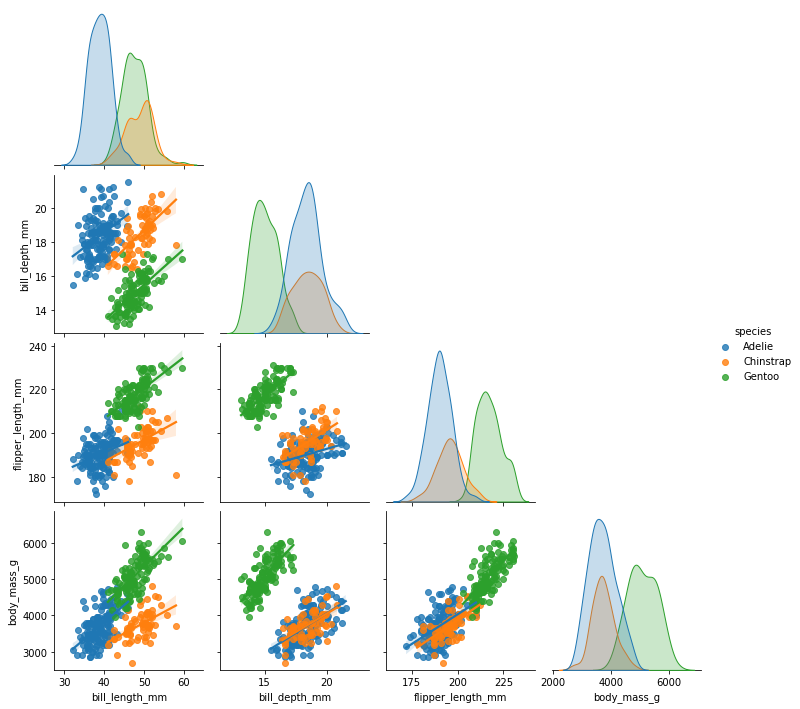

In [9]:
sns.pairplot(df, hue="species", corner=True, kind='reg')

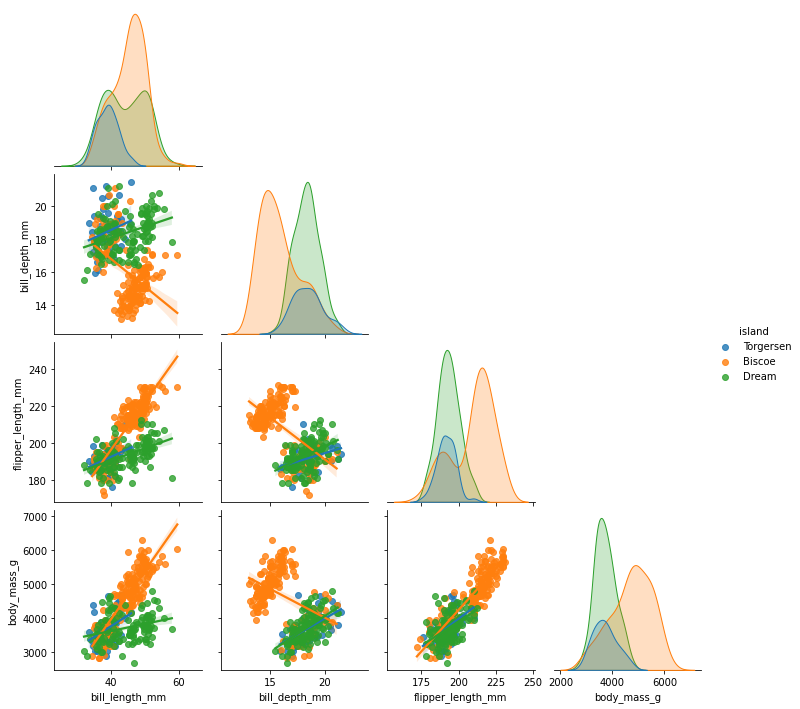

In [10]:
sns.pairplot(df, hue="island", corner=True, kind='reg')

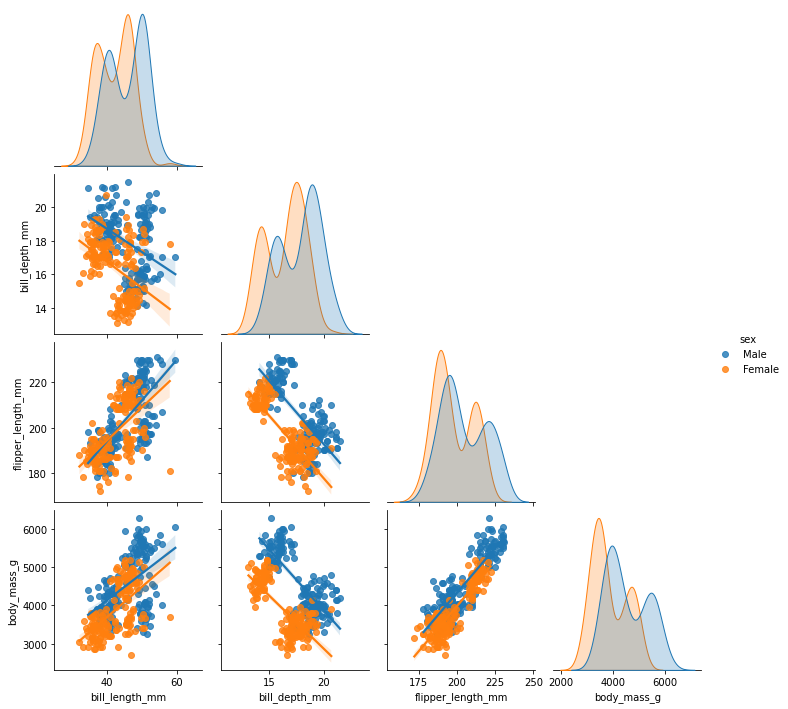

In [11]:
sns.pairplot(df, hue="sex", corner=True, kind='reg')

## Resuelva los siguientes incisos escribiendo el código o la respuesta, según el caso.


---

###1.  ¿Qué conclusiones puede obtener del análisis exploratorio realizado hasta el momento? ¿Considera que este dataset tiene ciertas regularidades que podrían ser capturadas por un modelo de aprendizaje automático?  ¿Considera que hay ciertos atributos numéricos o combinación de atributos numéricos que permitirían predecir la etiqueta ``species``? ¿Qué puede decir respecto al uso de los atributos numéricos para predecir ``island`` o ``sex``?





**Escriba aquí su respueta:** 
Del análisis exploratorio, parece que hay regularidades que pueden ser capturadas. Hay pares que a simple vista ya denotan la posibilidad de predecir los limites entre las especies.
En la primera imagen se puede observar que la distribución del flipper_length_mm nos va a permitir diferenciar a la especie Gentoo, de las Adelie y Chinstrap.
De la segunda imagen podemos deducir que con el flipper_length_mm también podremos diferenciar a los pingüinos que viven en Biscoe, de los que viven en Dream y Torgersen.
En la última imagen podemos ver que la relación (bill_depth_mm, body_mass_g) es lo que mejor nos va a permitir reconocer el sexo de la especie.

*¿Considera que hay ciertos atributos numéricos o combinación de atributos numéricos que permitirían predecir la etiqueta species? ¿Qué puede decir respecto al uso de los atributos numéricos para predecir island o sex?*
La combinación bill_length_mm,flipper_length_mm parece la mejor para poder predecir la especie.
Para predecir el sexo, no nos va a alcanzar con un atributo numérico, sino con una combinación de varios de ellos. Con respecto a la isla, creo que el flipper_length_mm por si solo hace un buen trabajo de clasificación.






---
###2. El análisis visual realizado nos muestra que existe una relación entre los atributos numéricos ``flipper_length_mm`` y ``body_mass_g``. Utilice regresión lineal (``LinearRegression``) de ScikitLearn para encontrar el modelo que mejor ajusta a estos datos. Indique cuáles son los parámetros del modelo.

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

species_map = {
    "Adelie": 0,
    "Gentoo": 1,
    "Chinstrap": 2
}

X = df[["flipper_length_mm", "body_mass_g"]]
y = df["species"].replace(species_map)
model.fit(X, y)
a = model.coef_[0]
b = model.intercept_
print("a=", a)
print("b=", b)


a= 0.039631944527222795
b= -5.464743499001237


**Escriba aquí su respuesta:** Los mejores parámetros encontrados con una regresión lineal son una pendiente de 0.039631944527222795 y una intersección de -5.464743499001237



---
###3. Divida el dataset en conjunto de entrenamiento (train set) y prueba (test set) usando la proporción 75% - 25% y entrene un modelo de regresión lineal que utilice el atributo ``flipper_length_mm``  para predecir  ``body_mass_g``.  Utilice el método ``mean_square_error`` de ScikitLearn para devolver el *Mean squared error regression loss* calculado entre las etiquetas predichas por el modelo y las etiquetas reales del conjunto de entrenamiento y entre las etiquetas predichas por el modelo y  las etiquetas reales del conjunto de prueba. 
###¿Existe sobreajuste (overfitting)? Justifique su respuesta.


MSE train: 153994.9236032495
 MSE test: 153451.7221337104


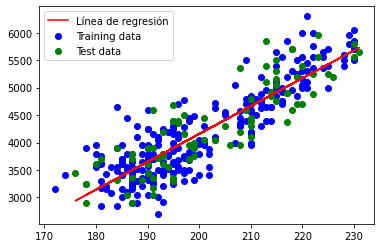

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Opción 2 de splitting
X_train, X_test, y_train, y_test = train_test_split(df[["flipper_length_mm"]], df[["body_mass_g"]], test_size=0.25, random_state=90)

model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

train_y_fit = model.predict(X_train)
test_y_fit = model.predict(X_test)

plt.scatter(X_train, y_train, color="blue", label="Training data")
plt.scatter(x=X_test,y=y_test, color="green",  label="Test data")
plt.plot(X_test, test_y_fit, color="red", label="Línea de regresión")
plt.legend()

train_loss = mean_squared_error(y_train,train_y_fit)
test_loss = mean_squared_error(y_test,test_y_fit)
print(f"MSE train: {train_loss}\n MSE test: {test_loss}")


**Escriba aquí su respueta:** ...
No existe overfitting ya que el error del conjunto de entrenamiento es similar al del conjunto de testeo. Esto significa que no se sobreajustó al conjunto de entrenamiento, y generalizó bien frente al conjunto de testeo.
Esto se mantiene así para distintos conjuntos de datos de train/test, logrados a través del parámetro random_state.

---
###4. Divida el dataset en conjunto de entrenamiento (train set) y prueba (test set) usando la proporción 80% - 20% y entrene un árbol de decisión (``DecisionTreeClassifier``) de ScikitLearn que utilice los atributos numéricos (*bill_length_mm*, *bill_depth_mm*, *flipper_length_mm*  y *body_mass_g*) para predecir la etiqueta *species*.

MSE train: 0.0
 MSE test: 0.19402985074626866


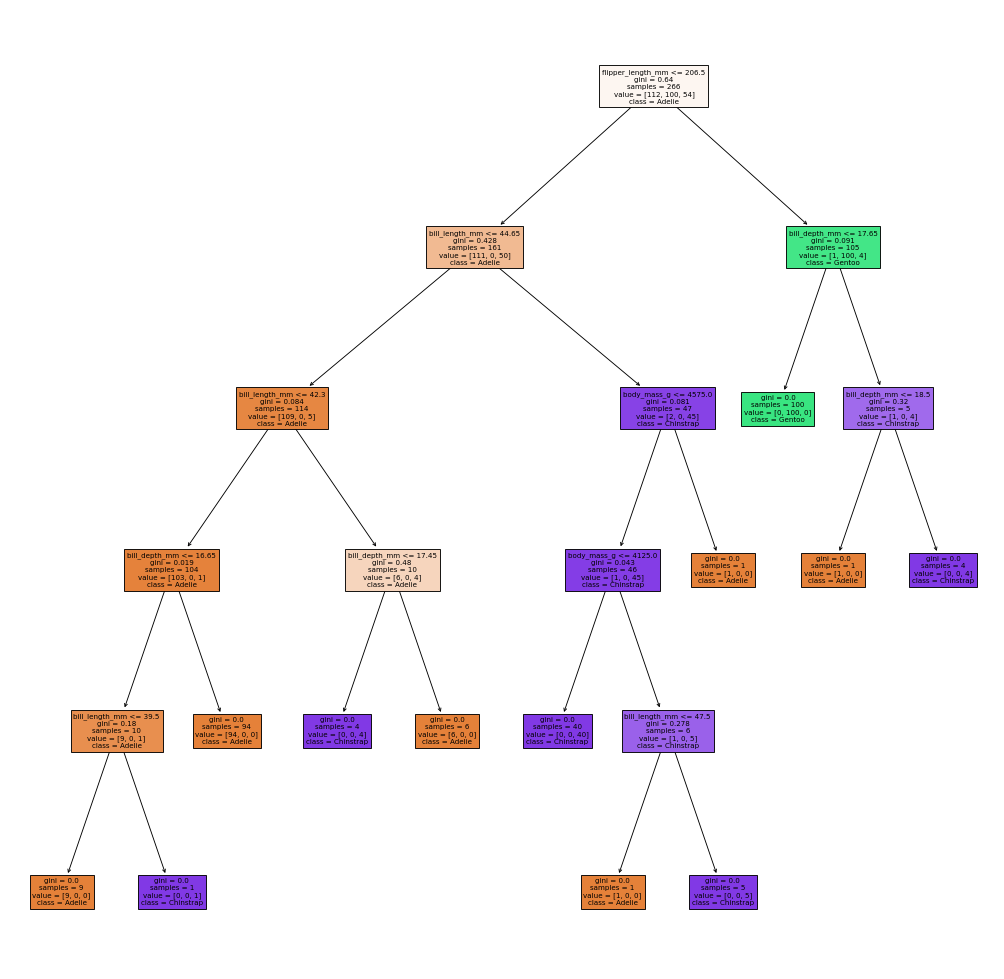

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree as tree_plotter

plt.rcParams['figure.figsize'] = (20,20)
plt.rcParams['figure.dpi'] = 64

feature_names = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(
    df[feature_names],
    df[["species"]].replace(species_map),
    test_size=0.2,
    random_state=4)

tree = DecisionTreeClassifier().fit(X_train_tree, y_train_tree)
test_y_fit_tree = tree.predict(X_test_tree)
train_y_fit_tree = tree.predict(X_train_tree)

train_loss = mean_squared_error(y_train_tree,train_y_fit_tree)
test_loss = mean_squared_error(y_test_tree,test_y_fit_tree)
print(f"MSE train: {train_loss}\n MSE test: {test_loss}")
_ = tree_plotter.plot_tree(tree,filled=True, feature_names=feature_names, class_names=list(species_map.keys()))


Azul => Adelie, Rojo => Gentoo, Verde => Chinstrap


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


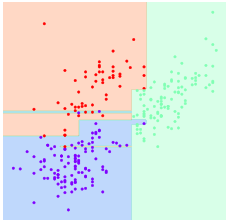

In [15]:
import numpy as np

plt.rcParams['figure.figsize'] = (9,9)
plt.rcParams['figure.dpi'] = 32

def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, 
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
visualize_classifier(DecisionTreeClassifier(),X_train_tree[["flipper_length_mm", "bill_length_mm"]],y_train_tree['species'])
print("Azul => Adelie, Rojo => Gentoo, Verde => Chinstrap")

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


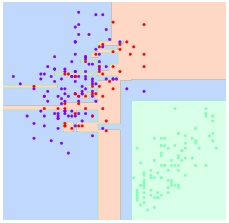

In [16]:
visualize_classifier(DecisionTreeClassifier(),X_train_tree[["flipper_length_mm", "bill_depth_mm"]],y_train_tree['species'])   

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


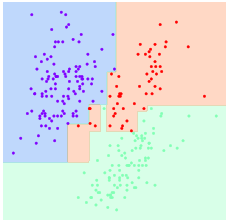

In [17]:
visualize_classifier(DecisionTreeClassifier(),X_train_tree[["bill_length_mm", "bill_depth_mm"]],y_train_tree['species'])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


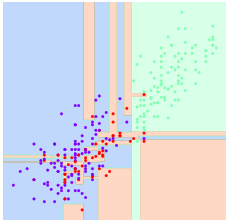

In [18]:

visualize_classifier(DecisionTreeClassifier(),X_train_tree[["flipper_length_mm", "body_mass_g"]],y_train_tree['species'])

---
###5. Muestre el desempeño del clasificador a través de la tabulación cruzada utilizando el método *crosstab*  de Pandas. Alternativamente puede utilizar una matriz de confusion (*confusion_matrix*) junto con un mapa de calor (*heatmap*) para realizar el mismo tipo de análisis. Describa qué tipo de errores cometió el modelo al realizar predicciones. 

{'Adelie': 0, 'Gentoo': 1, 'Chinstrap': 2}
Predicted   0   1   2  total
Real                        
0          33   0   1     34
1           1  18   0     19
2           2   0  12     14
total      36  18  13     67


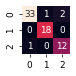

In [19]:
import pandas as pd
from sklearn.metrics import confusion_matrix

plt.rcParams['figure.figsize'] = (1,1)
plt.rcParams['figure.dpi'] = 64

print(species_map)
print(pd.crosstab(y_test_tree['species'], test_y_fit_tree, rownames=['Real'], colnames=['Predicted'], margins=True, margins_name='total'))

mat = confusion_matrix(y_test_tree['species'], test_y_fit_tree)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)


**Escriba aquí su respuesta:**

Los errores cometidos fueron:

**Falsos positivos:**

*   3 veces se predijo que era una especia Adelie, y no lo eran.

**Falsos negativos:**

* 2 veces se predijo que no eran Chinstrap, y sí lo eran
* 1 vez se predijo que no era Gentoo, y sí lo era

De este resultado podemos decir que el clasificador tiende a clasificar las especies Adelie cuando no lo son.



---
###6. Utilizando el método ``classification_report`` de ScikitLearn, presente un breve reporte de la efectividad del clasificador en el conjunto de prueba. Determine cuál es la especie de pingüino para la que se logra el mayor f1-score. Indique si este resultado es consistente con lo que se anticipaba a partir del análisis visual realizado. Justifique.

In [20]:
from sklearn import metrics
print(metrics.classification_report(y_test_tree['species'],test_y_fit_tree,target_names=df.species.unique(), digits=3))

              precision    recall  f1-score   support

      Adelie      0.917     0.971     0.943        34
   Chinstrap      1.000     0.947     0.973        19
      Gentoo      0.923     0.857     0.889        14

    accuracy                          0.940        67
   macro avg      0.947     0.925     0.935        67
weighted avg      0.942     0.940     0.940        67



**Escriba aquí su respueta:** 
La especie que tiene más F1 es la Chinstrap. Esto es así porque en cuentro a precisión es la mejor, es decir, todas las veces que se predijo Chinstrap, efectivamente lo eran, y además tiene una cobertura del 0.947, lo que significa que pocas especies no fueron clasificadas como Chinstrap y realmente lo eran.

Esto es consistente con el análisis visual de a pares ya que siempre se ve a la clase Chinstrap(verde) mas distanciada del resto, lo que la hace más facil de clasificar.

---
###7. Utilice el método ``cross_val_score`` de ScikitLearn para realizar validación cruzada (cross-fold validation) utilizando 5 plieges (folds). Reporte el valor de *accuracy* para cada pliege y el *accuracy* promedio.  

In [21]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree, X_train_tree, y_train_tree, cv=5, scoring='accuracy')
print("Accuracy de cada fold: ", scores)
print("Promedio de accuracy: ",sum(scores)/len(scores))



Accuracy de cada fold:  [0.98148148 0.96226415 0.94339623 0.96226415 0.98113208]
Promedio de accuracy:  0.9661076170510133


---
### 8. Repita los pasos 4 a 7 utilizando un modelo ``RandomForestClassifier`` de ScikitLearn. ¿Observa alguna mejora en la efectividad del clasificador ensemble  ``RandomForestClassifier`` respecto a la del clasificador ``DecisionTreeClassifier``?

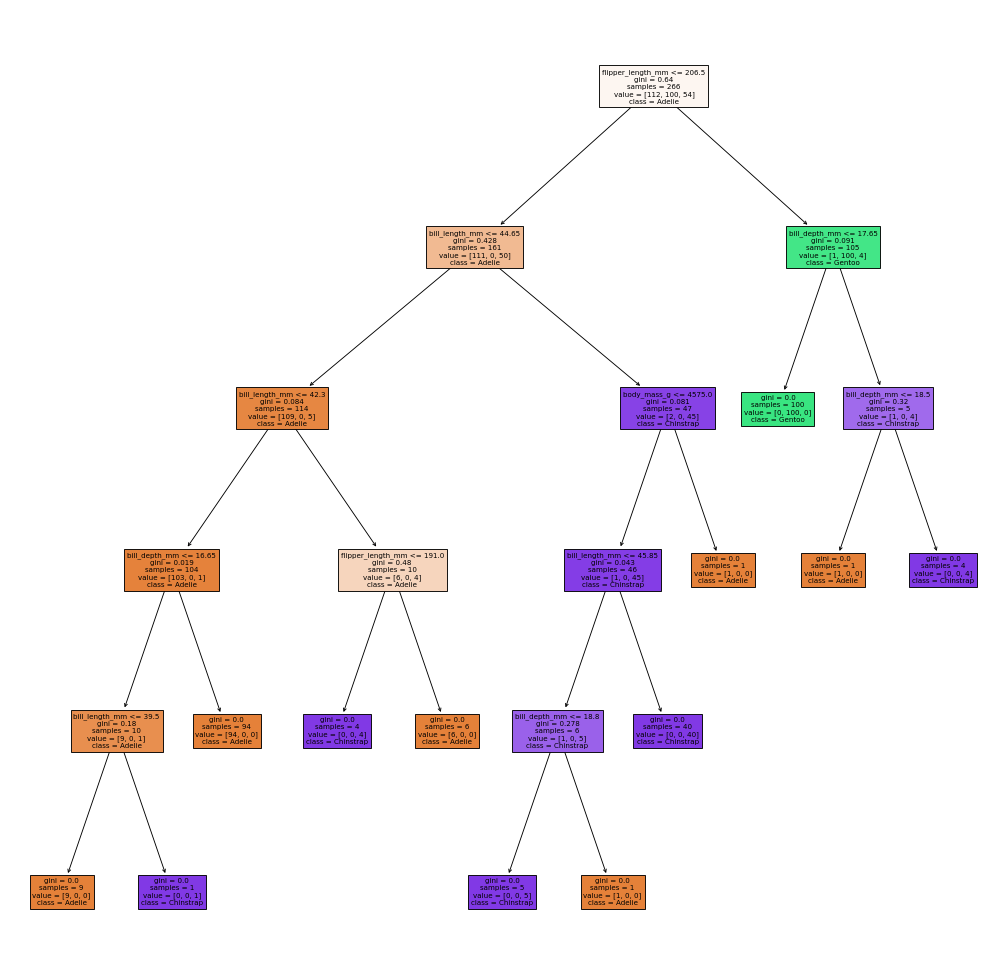

In [22]:
plt.rcParams['figure.figsize'] = (20,20)
plt.rcParams['figure.dpi'] = 64

feature_names = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    df[feature_names],
    df[["species"]].replace(species_map),
    test_size=0.2,
    random_state=4)

tree_rf = DecisionTreeClassifier().fit(X_train_rf, y_train_rf)
test_y_fit_rf = tree_rf.predict(X_test_rf)
train_y_fit_rf = tree_rf.predict(X_train_rf)

_ = tree_plotter.plot_tree(tree_rf,filled=True, feature_names=feature_names, class_names=list(species_map.keys()))


Predicted   0   1   2  total
Real                        
0          32   0   2     34
1           1  18   0     19
2           2   0  12     14
total      35  18  14     67


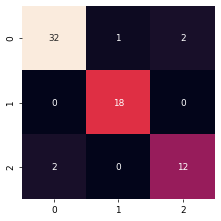

In [23]:
# Análisis
plt.rcParams['figure.figsize'] = (4,4)
plt.rcParams['figure.dpi'] = 64

print(pd.crosstab(y_test_rf['species'], test_y_fit_rf, rownames=['Real'], colnames=['Predicted'], margins=True, margins_name='total'))

mat = confusion_matrix(y_test_rf['species'], test_y_fit_rf)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)

In [24]:
print(metrics.classification_report(y_test_rf['species'],test_y_fit_rf,target_names=df.species.unique(), digits=3))

scores = cross_val_score(tree, X_train_rf, y_train_rf, cv=5, scoring='accuracy')
print("Accuracy de cada fold: ", scores)
print("Promedio de accuracy: ",sum(scores)/len(scores))

              precision    recall  f1-score   support

      Adelie      0.914     0.941     0.928        34
   Chinstrap      1.000     0.947     0.973        19
      Gentoo      0.857     0.857     0.857        14

    accuracy                          0.925        67
   macro avg      0.924     0.915     0.919        67
weighted avg      0.927     0.925     0.926        67

Accuracy de cada fold:  [0.98148148 0.96226415 0.94339623 0.96226415 0.98113208]
Promedio de accuracy:  0.9661076170510133


**Escriba aquí su respuesta:** ...
*¿Observa alguna mejora en la efectividad del clasificador ensemble RandomForestClassifier respecto a la del clasificador DecisionTreeClassifier?


La técnica de Random Forest arroja una accuracy más baja con respecto a la técnica de Árboles de decisión, 0.97742 vs 0.96610 pero mejora la métrica del F1 notoriamente para cada una de las categorías.

* Adelie => random forest 0.958 vs decision trees 0.943
* Chinstrap => random forest 0.947 vs decision trees 0.947
* Gentoo => random forest 0.923 vs decision trees 0.889

---
### 9.   Intentaremos utilizar los atributos numéricos (*bill_length_mm*, *bill_depth_mm*, *flipper_length_mm*  y *body_mass_g*) para predecir la etiqueta *sex*. Divida el dataset en conjunto de entrenamiento (train set) y prueba (test set) usando la proporción 80% - 20% y utilice un clasificador de vectores de soporte (``SVC ``) con ``kernel='linear'`` y ``C=1E10``. ¿Qué dificultades observa?

In [43]:
from sklearn.svm import SVC # "Support vector classifier"

feature_names = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
sex_map = {'Male': 0, 'Female': 1}
X_train_svc, X_test_svc, y_train_svc, y_test_svc = train_test_split(
    df[feature_names],
    df[["sex"]].replace(sex_map),
    test_size=0.2,
    random_state=1)

model_svc = SVC(kernel='linear', C=1)
model_svc.fit(X_train_svc, y_train_svc)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, kernel='linear')

**Escriba aquí su respueta:** ...
El algoritmo nunca terminó de converger en una solución adecuada con un valor de C=1E10 dado que el conjunto de datos no es separable linealmente. Al elegir un margen muy duro (valor alto de C) se le hace imposible al algoritmo llegar en tiempo y forma a una clasificación correcta.






---
### 10. Una vez más, intentaremos utilizar los atributos numéricos (*bill_length_mm*, *bill_depth_mm*, *flipper_length_mm*  y *body_mass_g*) para predecir la etiqueta *sex*. Intente resolver el problema utilizando un clasificador de vectores de soporte (``SVC ``) con hiperparámetros optimizados para ``scoring='accuracy'`` mediante el uso de ``GridSearchCV`` (explore al menos dos valores para dos hiperparámetros). ¿Qué conclusiones obtiene? 

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid={'C': [1, 10, 100, 1000, 10000, 100000], 'kernel': ('linear', 'rbf')}

grid = GridSearchCV(SVC(), param_grid , cv=5, scoring='accuracy')
grid.fit(X_train_svc, y_train_svc)
grid_table = pd.DataFrame(grid.cv_results_)

In [37]:
grid_table.sort_values(ascending=True, by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.998484,0.534994,0.002068,0.000423,1,linear,"{'C': 1, 'kernel': 'linear'}",0.851852,0.905660,0.905660,0.924528,0.886792,0.894899,0.024610,1
8,0.992912,0.517865,0.001997,0.000256,10000,linear,"{'C': 10000, 'kernel': 'linear'}",0.851852,0.924528,0.905660,0.924528,0.867925,0.894899,0.029841,1
6,1.075038,0.468527,0.001947,0.000111,1000,linear,"{'C': 1000, 'kernel': 'linear'}",0.851852,0.905660,0.905660,0.924528,0.867925,0.891125,0.026903,3
10,2.097507,1.488897,0.002011,0.000137,100000,linear,"{'C': 100000, 'kernel': 'linear'}",0.814815,0.905660,0.905660,0.886792,0.905660,0.883718,0.035218,4
2,1.039178,0.765963,0.001919,0.000110,10,linear,"{'C': 10, 'kernel': 'linear'}",0.833333,0.886792,0.905660,0.924528,0.867925,0.883648,0.031447,5
11,0.041906,0.008283,0.002194,0.000070,100000,rbf,"{'C': 100000, 'kernel': 'rbf'}",0.814815,0.905660,0.886792,0.905660,0.886792,0.879944,0.033640,6
4,1.023102,0.353968,0.002022,0.000089,100,linear,"{'C': 100, 'kernel': 'linear'}",0.833333,0.905660,0.905660,0.886792,0.867925,0.879874,0.027154,7
9,0.006781,0.000993,0.001420,0.000036,10000,rbf,"{'C': 10000, 'kernel': 'rbf'}",0.796296,0.867925,0.886792,0.849057,0.886792,0.857372,0.033591,8
7,0.004155,0.000378,0.001561,0.000085,1000,rbf,"{'C': 1000, 'kernel': 'rbf'}",0.629630,0.811321,0.698113,0.735849,0.773585,0.729700,0.062670,9
5,0.003693,0.000360,0.001600,0.000125,100,rbf,"{'C': 100, 'kernel': 'rbf'}",0.629630,0.792453,0.641509,0.754717,0.698113,0.703284,0.063031,10


**Escriba aquí su respueta:** 
Las mejores combinaciones de hiperparámetros para SVC son las que usan un kernel lineal, con un C de 1 y un C de 10000.

